In [88]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [90]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [92]:
import pandas as pd
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.Series(data.target)

In [94]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [96]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
# no null value
# all data is in float so no need of value encoding

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [100]:
df.duplicated().sum()

0

In [102]:
# or can check by this this if any duplicate value
df[df.duplicated()]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target


In [104]:
X = df.drop('target', axis = 'columns')
y = df.target

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20, random_state=0)

In [108]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [110]:
params = {
    'n_estimators':[100,200],
    'learning_rate':[0.01,0.1],
    'max_depth':[3,5]
}

gs = GridSearchCV(GradientBoostingRegressor(),params,cv = 5, return_train_score=False)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]})

In [112]:
gs.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

In [114]:
y_pred = gs.predict(X_test)
print(y_pred)

[236.13157624 218.0929101  178.29466748 119.53210416 186.93452279
 241.52332337 103.16349387 212.50770199 127.72566998 214.92673284
 156.3488602  166.2303349  115.5265131  114.44794945 250.45184758
 100.69089944 132.57663183  92.18313351 110.25603296 202.58502626
 190.27482558 141.23142578 172.86459373 134.65384256 205.80051808
 196.85289806 121.57075467  96.17271487 188.24357789 165.56366831
 198.5023287  101.95502166 121.11782111 131.96314387 159.09892691
 162.2301506  149.85260132 141.98614548  93.95045395 203.2765913
 115.77227186 154.33485647 146.85987032 170.42228082 177.36535925
  93.53140378 120.12571609 135.0983806  124.90509916 231.98338017
 139.34086373  98.49883598 171.6583549  175.40330872 238.43450299
 203.98236128 206.88816932 104.16104686 112.84733278 169.36062802
 221.09583276 144.09564036 136.0786217  112.21540886 226.18970569
 141.51986741 107.27110512 206.0112821  206.78447875 103.20284005
  90.77300502 160.30303117 127.16295194 138.37292768 123.1072908
 176.7955875

In [116]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred,y_test)
mae

47.858577311037564

### Now we calculate which features are contributing more

In [124]:
feature_score = gs.feature_importances_
feature_score

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [130]:
# we have apply the GradientBoostingRegressor alone
gbr = GradientBoostingRegressor(learning_rate =  0.01, max_depth =  3, n_estimators= 200)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

mae = mean_absolute_error(y_pred,y_test)
mae

47.859086577671725

In [144]:
# index = X_train.columns

feature_score = pd.Series(gbr.feature_importances_, index=data.feature_names).sort_values(ascending=False)  
print(feature_score)

s5     0.513794
bmi    0.275565
bp     0.079416
s3     0.040325
s2     0.026264
s6     0.021809
s1     0.012864
age    0.012041
s4     0.009554
sex    0.008370
dtype: float64


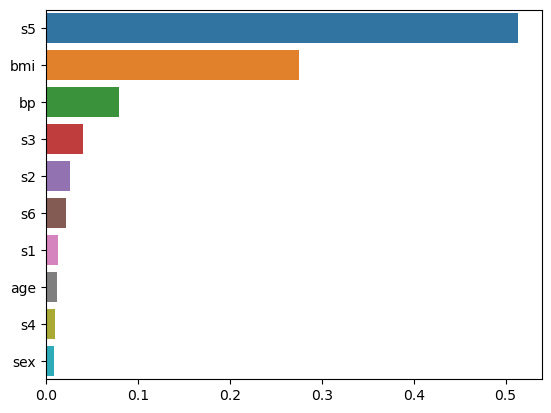

In [166]:
sns.barplot(x = feature_score, y = feature_score.index )
plt.show()